In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

# 1. Loading the data

In [2]:
df=pd.read_csv('D:\\flights2022.csv',na_values=['NA'])
df.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111376 entries, 0 to 111375
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111376 non-null  int64  
 1   month           111376 non-null  int64  
 2   day             111376 non-null  int64  
 3   dep_time        108931 non-null  float64
 4   sched_dep_time  111376 non-null  int64  
 5   dep_delay       108931 non-null  float64
 6   arr_time        108834 non-null  float64
 7   sched_arr_time  111376 non-null  int64  
 8   arr_delay       108697 non-null  float64
 9   carrier         111376 non-null  object 
 10  flight          111376 non-null  int64  
 11  tailnum         111247 non-null  object 
 12  origin          111376 non-null  object 
 13  dest            111376 non-null  object 
 14  air_time        108697 non-null  float64
 15  distance        111376 non-null  int64  
 16  hour            111376 non-null  int64  
 17  minute    

# 2. Understanding and cleaning the data
- ###  The flight data contains some missing and wrong-formatted data which has to be cleaned up first.


In [4]:
def hhmm_to_string_time(series):
    return series.dropna().astype(int).apply(lambda x: f"{x:04}").apply(lambda x: f"{x[:2]}:{x[2:]}:00")


df.loc[df['dep_time'].notna(), 'dep_time'] = hhmm_to_string_time(df['dep_time'])
df.loc[df['arr_time'].notna(), 'arr_time'] = hhmm_to_string_time(df['arr_time'])
df.loc[df['sched_arr_time'].notna(), 'sched_arr_time'] = hhmm_to_string_time(df['sched_arr_time'])
df.loc[df['sched_dep_time'].notna(), 'sched_dep_time'] = hhmm_to_string_time(df['sched_dep_time'])


C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_4124\4006814592.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['00:01:00' '00:01:00' '00:10:00' ... '23:53:00' '23:59:00' '24:00:00']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['dep_time'].notna(), 'dep_time'] = hhmm_to_string_time(df['dep_time'])
C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_4124\4006814592.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['06:04:00' '02:42:00' '07:59:00' ... '07:22:00' '05:52:00' '07:47:00']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['arr_time'].notna(), 'arr_time'] = hhmm_to_string_time(df['arr_time'])
C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_4124\4006814592.py:7: FutureWarning: Setting an item of in

In [5]:
df = df.dropna(subset=['dep_delay', 'arr_delay'])


In [6]:
df['tailnum'] = df['tailnum'].fillna('Unknown')


In [7]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,00:01:00,23:59:00,2.0,06:04:00,06:18:00,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,00:01:00,22:50:00,71.0,02:42:00,01:42:00,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,00:10:00,23:55:00,15.0,07:59:00,07:30:00,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,00:25:00,23:50:00,35.0,06:06:00,05:50:00,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,00:35:00,23:49:00,46.0,06:16:00,05:45:00,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.


In [8]:
df = df.dropna(subset=['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time'])


In [9]:
# Create two columns with Ontime, Late and Cancelled status for both departure and arrival
df.loc[df.dep_delay.isna(), "dep_status"]="Canceled"
df.loc[df.dep_delay <= 0, "dep_status"]="OnTime"
df.loc[df.dep_delay > 0, "dep_status"]="Late"
df.loc[df.arr_delay.isna(), "arr_status"]="Canceled"
df.loc[df.arr_delay <= 0, "arr_status"]="OnTime"
df.loc[df.arr_delay > 0, "arr_status"]="Late"


In [10]:
df.shape

(108697, 22)

In [11]:
df.isna().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
airline           0
dep_status        0
arr_status        0
dtype: int64

In [12]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'airline', 'dep_status', 'arr_status'],
      dtype='object')

In [13]:
df.head(100)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,airline,dep_status,arr_status
0,2022,1,1,00:01:00,23:59:00,2.0,06:04:00,06:18:00,-14.0,UA,...,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,Late,OnTime
1,2022,1,1,00:01:00,22:50:00,71.0,02:42:00,01:42:00,60.0,AS,...,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,Late,Late
2,2022,1,1,00:10:00,23:55:00,15.0,07:59:00,07:30:00,29.0,AS,...,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,Late,Late
3,2022,1,1,00:25:00,23:50:00,35.0,06:06:00,05:50:00,16.0,AS,...,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,Late,Late
4,2022,1,1,00:35:00,23:49:00,46.0,06:16:00,05:45:00,31.0,UA,...,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022,1,1,08:25:00,08:31:00,-6.0,14:35:00,14:47:00,-12.0,AS,...,SEA,IAH,228.0,1874,8,31,2022-01-01T08:00:00Z,Alaska Airlines Inc.,OnTime,OnTime
96,2022,1,1,08:27:00,08:20:00,7.0,11:56:00,12:15:00,-19.0,WN,...,SEA,PHX,129.0,1107,8,20,2022-01-01T08:00:00Z,Southwest Airlines Co.,Late,OnTime
97,2022,1,1,08:31:00,08:35:00,-4.0,13:18:00,12:55:00,23.0,AS,...,PDX,LIH,316.0,2631,8,35,2022-01-01T08:00:00Z,Alaska Airlines Inc.,OnTime,Late
98,2022,1,1,08:35:00,08:30:00,5.0,12:32:00,12:35:00,-3.0,HA,...,PDX,OGG,322.0,2562,8,30,2022-01-01T08:00:00Z,Hawaiian Airlines Inc.,Late,OnTime


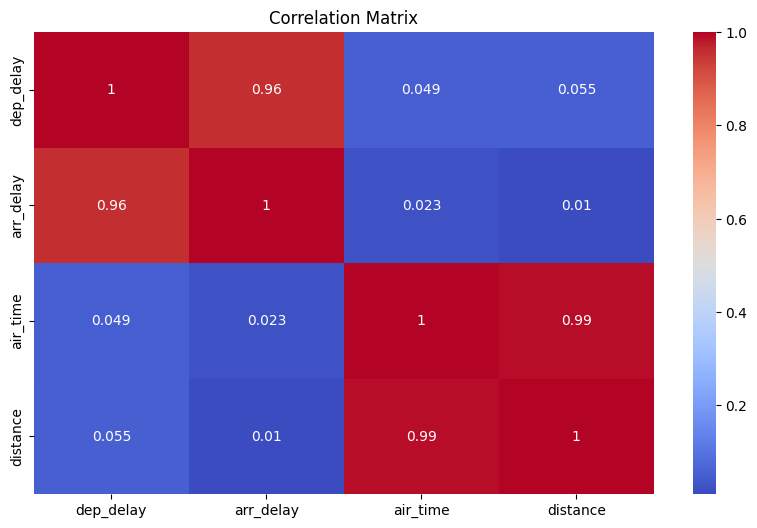

In [14]:
correlation = df[['dep_delay','arr_delay','air_time','distance']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'airline', 'dep_status', 'arr_status'],
      dtype='object')

In [16]:
# df['3hr_window'] = (df['hour'] // 3) * 3
# df['3hr_window'] = df['3hr_window'].astype(str) + '-' + (df['3hr_window'] + 3).astype(str)


# Step 1: Define 3-hour bins and corresponding labels
bins = list(range(0, 25, 3))  # [0, 3, 6, ..., 24]
labels = [f"{i}-{i+3} {'AM' if i < 12 else 'PM'}" for i in bins[:-1]]

# Step 2: Create a 'time_window' column
df['time_window'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False)

In [17]:
# avg_delay = df.groupby(['3hr_window', 'airline'])['dep_delay'].mean().reset_index()

# Step 3: Group and calculate average dep_delay
avg_delay = df.groupby(['time_window', 'airline'])['dep_delay'].mean().reset_index()

# Optional: sort to find peak window
peak_windows = avg_delay.groupby('time_window')['dep_delay'].mean().sort_values(ascending=False)
print("Top peak delay windows:\n", peak_windows.head())


Top peak delay windows:
 time_window
0-3 AM      18.585561
21-24 PM    18.520734
15-18 PM    16.560529
18-21 PM    16.076107
12-15 PM    13.867797
Name: dep_delay, dtype: float64


C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_4124\2835429344.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = df.groupby(['time_window', 'airline'])['dep_delay'].mean().reset_index()
C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_4124\2835429344.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peak_windows = avg_delay.groupby('time_window')['dep_delay'].mean().sort_values(ascending=False)


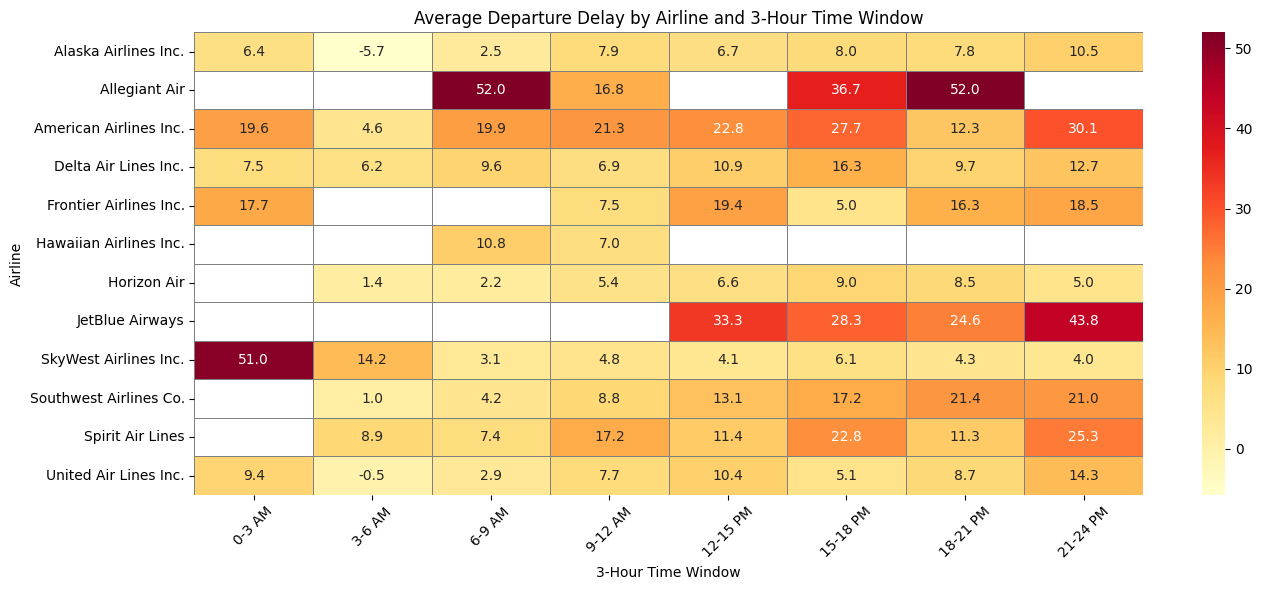

In [18]:
# peak_windows = avg_delay.loc[avg_delay.groupby('airline')['dep_delay'].idxmax()]
# Step 4: Pivot for heatmap
heatmap_data = avg_delay.pivot(index='airline', columns='time_window', values='dep_delay')

# Step 5: Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5, linecolor='gray')
plt.title("Average Departure Delay by Airline and 3-Hour Time Window")
plt.xlabel("3-Hour Time Window")
plt.ylabel("Airline")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')
df['is_red_eye'] = df['dep_time'].dt.hour.between(0, 4)
df['is_red_eye'].value_counts()

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_4124\908236785.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')


is_red_eye
False    106759
True       1938
Name: count, dtype: int64

In [20]:
red_eye_vs_day = df.groupby('is_red_eye')['arr_delay'].describe()


In [21]:
from scipy.stats import ttest_ind
ttest_ind(df[df['is_red_eye']]['arr_delay'].dropna(), 
          df[~df['is_red_eye']]['arr_delay'].dropna(), 
          equal_var=False)


TtestResult(statistic=np.float64(10.377888502089077), pvalue=np.float64(1.3338268067871197e-24), df=np.float64(1964.5395256242587))

<Axes: xlabel='is_red_eye', ylabel='arr_delay'>

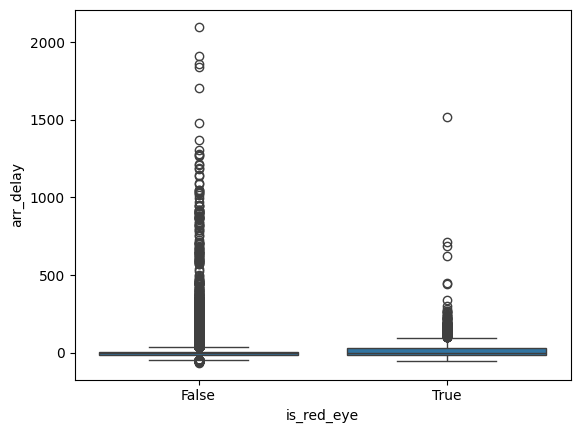

In [22]:
import seaborn as sns
sns.boxplot(x='is_red_eye', y='arr_delay', data=df)


# ✅ Q2: Hourly Delay Trends

In [23]:
df['dep_hour'] = df['dep_time'].dt.hour


In [24]:
hourly_median = df.groupby('dep_hour')['dep_delay'].median().reset_index()
hourly_median

,dep_hour,dep_delay
0,0.0,7.0
1,1.0,51.0
2,2.0,153.5
3,3.0,201.0
4,4.0,-5.0
5,5.0,-4.0
6,6.0,-3.0
7,7.0,-3.0
8,8.0,-2.0
9,9.0,-3.0


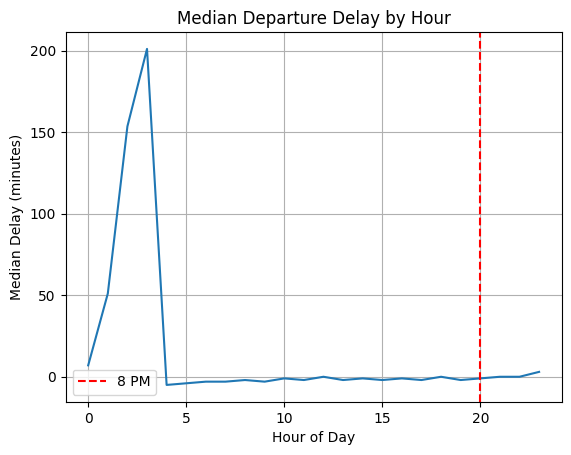

In [25]:
import matplotlib.pyplot as plt
plt.plot(hourly_median['dep_hour'], hourly_median['dep_delay'])
plt.axvline(20, color='red', linestyle='--', label='8 PM')
plt.title('Median Departure Delay by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Median Delay (minutes)')
plt.legend()
plt.grid(True)


# ✅ 1. Seasonal Delay Patterns
- ##  Which month has the worst arrival delays, and does this correlate with weather events or holidays?

In [26]:
monthly_arr_delay= df.groupby('month')['arr_delay'].mean().reset_index()

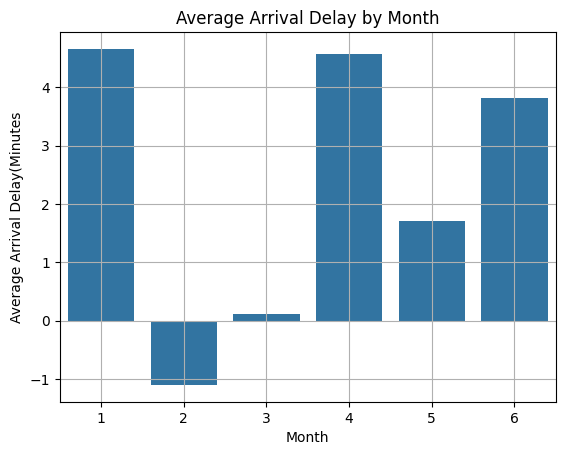

In [27]:
sns.barplot(x='month',y='arr_delay',data=monthly_arr_delay)
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay(Minutes');
plt.grid(True)

In [28]:
df['month'].unique()

array([1, 2, 3, 4, 5, 6])

## Interpret the Results
- ### Identify the month with the highest delay (e.g., July or December).

- ### Then correlate that with known weather conditions (e.g., snow in Jan, thunderstorms in summer) or holidays (e.g., Thanksgiving, Christmas).

In [29]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'airline', 'dep_status', 'arr_status', 'time_window',
       'is_red_eye', 'dep_hour'],
      dtype='object')

In [30]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [31]:
# Define long-haul and short-haul
df['haul_type'] = df['distance'].apply(lambda x: 'long' if x > 1500 else 'short')

# Group by airline and haul type, then calculate median departure delay
median_delays = df.groupby(['airline', 'haul_type'])['dep_delay'].median().reset_index()

# Find the lowest median delay per haul type
lowest_median = median_delays.loc[median_delays.groupby('haul_type')['dep_delay'].idxmin()]
print(lowest_median)


                  airline haul_type  dep_delay
14  SkyWest Airlines Inc.      long       -2.0
20  United Air Lines Inc.     short       -4.0


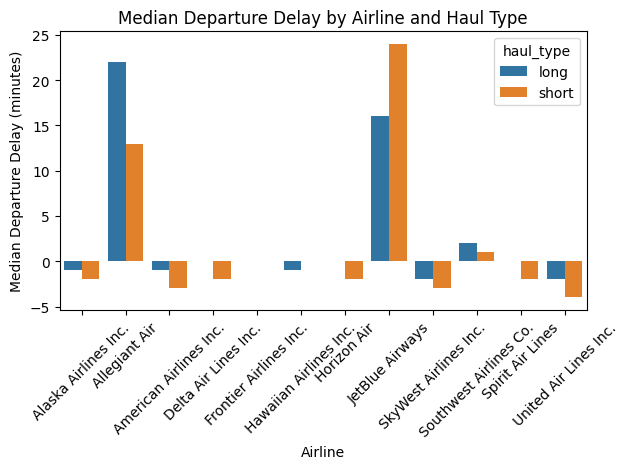

In [32]:
sns.barplot(data=median_delays, x='airline', y='dep_delay', hue='haul_type')
plt.title("Median Departure Delay by Airline and Haul Type")
plt.xlabel("Airline")
plt.ylabel("Median Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
# Create O-D pair column
df['OD_pair'] = df['origin'] + "-" + df['dest']

# Calculate variance in arrival delay per O-D pair
od_variance = df.groupby('OD_pair')['arr_delay'].var().reset_index()
top5_od = od_variance.sort_values(by='arr_delay', ascending=False).head(5)

# Check carrier dominance on these routes
dominant_carriers = df[df['OD_pair'].isin(top5_od['OD_pair'])].groupby(['OD_pair', 'carrier']).size().reset_index(name='flight_count')

# Find the dominant carrier per route
dominant_carriers = dominant_carriers.sort_values(['OD_pair', 'flight_count'], ascending=[True, False])
dominant_per_route = dominant_carriers.groupby('OD_pair').first().reset_index()
print(dominant_per_route)

   OD_pair carrier  flight_count
0  PDX-BOS      AS           107
1  PDX-DFW      AA           644
2  PDX-JFK      AS           206
3  SEA-CLT      AA           446
4  SEA-MIA      AA           177


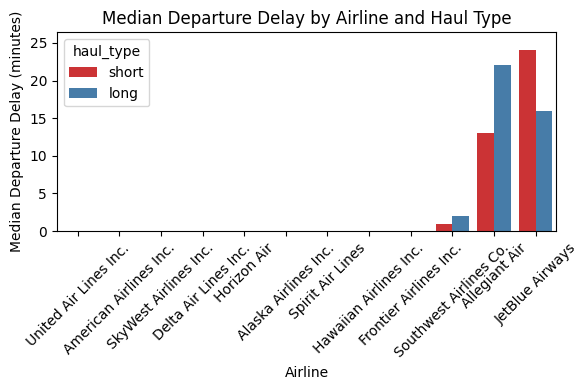

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by delay to improve readability
sorted_data = median_delays.sort_values(by='dep_delay')

plt.figure(figsize=(6, 4))
sns.barplot(
    data=sorted_data,
    x='airline',
    y='dep_delay',
    hue='haul_type',
    palette='Set1'
)

plt.title("Median Departure Delay by Airline and Haul Type")
plt.xlabel("Airline")
plt.ylabel("Median Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.ylim(0, sorted_data['dep_delay'].max() * 1.1)  # Prevent y-axis overflow
plt.tight_layout()
plt.show()

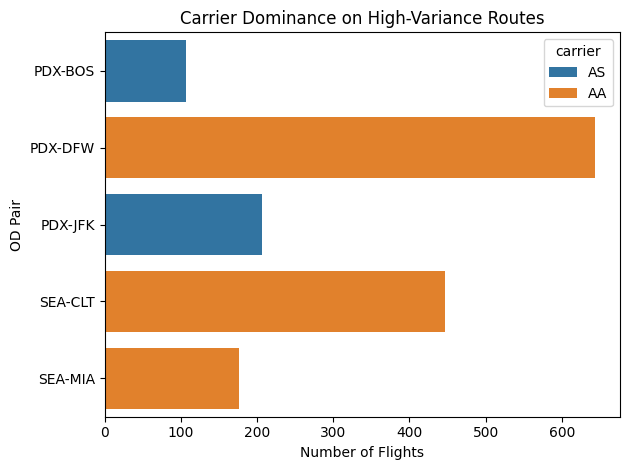

In [35]:
sns.barplot(
    data=dominant_per_route,
    y='OD_pair',
    x='flight_count',
    hue='carrier',
    dodge=False
)
plt.title("Carrier Dominance on High-Variance Routes")
plt.xlabel("Number of Flights")
plt.ylabel("OD Pair")
plt.tight_layout()
plt.show()

In [36]:
# Option 2: Fill missing values
# Fill missing dep_delay with 0
df['dep_delay'].fillna(0, inplace=True)
# Fill missing air_time with the mean of the column
df['air_time'].fillna(df['air_time'].mean(), inplace=True)

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_4124\596211088.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dep_delay'].fillna(0, inplace=True)
C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_4124\596211088.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [37]:
# #Generate profile reports
# profileReport = pd.ProfileReport(df)
# #Import profile report
# profileReport.to_file(outputfile="profile.html")
# #profileReport

# Distribution of data 

In [38]:
outliers=df[df['dep_delay'] > 360]


In [39]:
out_by_airport=outliers['origin'].value_counts()
out_by_carrier=outliers['carrier'].value_counts()
out_by_month=outliers['month'].value_counts()

<Axes: title={'center': 'Monthly Distribution of Extreme Departure Delays'}, xlabel='month'>

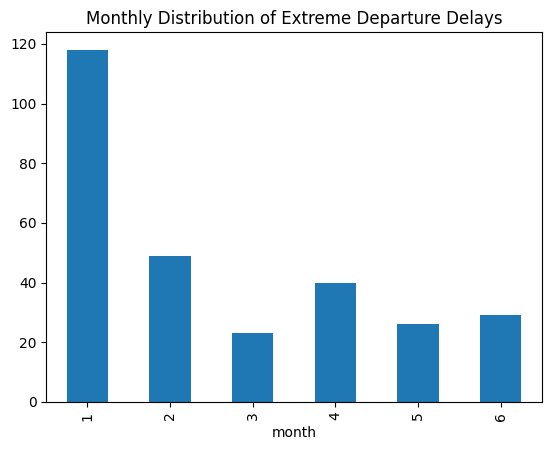

In [40]:
out_by_airport.head(5).plot(kind='bar', title='Top Airports with >6 Hour Departure Delays')
out_by_carrier.head(5).plot(kind='bar', title='Top Airlines with >6 Hour Departure Delays')
out_by_month.sort_index().plot(kind='bar', title='Monthly Distribution of Extreme Departure Delays')


# arrive >30 minutes late — possibly due to en-route delays, congestion, or weather.

In [41]:
import matplotlib.pyplot as plt

# Step 1: Get the percentage distribution
airline_late_arrivals = last_minute_delays['airline'].value_counts(normalize=True) * 100

# Step 2: Filter out 0% values (though value_counts already does that)
airline_late_arrivals = airline_late_arrivals[airline_late_arrivals > 0]

# Step 3: Optional - Group minor contributors into "Others" if needed
threshold = 3  # airlines below 3% grouped as "Others"
major_airlines = airline_late_arrivals[airline_late_arrivals >= threshold]
others = airline_late_arrivals[airline_late_arrivals < threshold].sum()

# Add 'Others' if exists
if others > 0:
    major_airlines['Others'] = others

# Step 4: Plot Pie Chart
plt.figure(figsize=(6, 8))
plt.pie(major_airlines.values, labels=major_airlines.index, autopct='%1.1f%%', startangle=140)
plt.title('Last-Minute Arrival Delays by Airline (Flights Departed On-Time)')
plt.axis('equal')  # Make it a circle
plt.show()


NameError: name 'last_minute_delays' is not defined

In [ ]:
total_on_time_departures = df[df['dep_delay'] <= 0].shape[0]
percent_last_minute_delay = (last_minute_delays.shape[0] / total_on_time_departures) * 100
percent_last_minute_delay

In [ ]:
airline_late_arrivals = last_minute_delays['airline'].value_counts(normalize=True) * 100
airline_late_arrivals

In [ ]:
df.describe()

In [ ]:
## Interpretation of Summary Statistics:

✅ General Observations:
Count: 111,376 non-null entries in each column → No missing values.

Delays (dep_delay, arr_delay):

Mean delays: dep_delay ≈ +7.86 mins, arr_delay ≈ +2.59 mins.

Negative values: Flights sometimes leave/arrive early (e.g., dep_delay min = -36).

Max dep_delay: 2120 mins (~35 hours) → Possible outlier or extreme delay.

Max arr_delay: 2098 mins → Could be real but requires verification.

Air Time & Distance:

Mean air time: ~137 mins, mean distance: ~1068 miles.

Longest flight: ~1507 mins (25 hours!) and distance of 2724 miles → long-haul flight.

In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Function to convert hh:mm time to total minutes
# def time_to_minutes(time_str):
#     if pd.isna(time_str) or time_str == 'NaT':
#         return np.nan
#     try:
#         hours, minutes = map(int, time_str.split(':'))
#         return hours * 60 + minutes
#     except:
#         return np.nan

# # Apply to your actual DataFrame (replace df with your actual DataFrame name)
# # Convert time columns to minutes
# time_columns = ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time']
# for col in time_columns:
#     df[f'{col}_minutes'] = df[col].astype(str).apply(time_to_minutes)

# # Select only numeric columns for correlation
# numeric_cols = df.select_dtypes(include=['number']).columns
# correlation_data = df[numeric_cols]

# # Generate correlation matrix
# correlation_matrix = correlation_data.corr()

# # Plot heatmap
# plt.figure(figsize=(12, 10))
# plt.title('Pearson Correlation of Flight Features', y=1.05, size=20, color='red')
# sns.heatmap(correlation_matrix, 
#             linewidths=0.1, 
#             vmax=1.0,
#             square=True, 
#             cmap=plt.cm.RdBu_r, 
#             linecolor='white',
#             annot=True,
#             fmt=".2f")

# plt.tight_layout()
# plt.show()


In [ ]:
df.head()

### Let us generate some correlation plot  of the features to see how realted one feature is to the next